In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [2]:
purity = 1.0
coverage = 100
general_folder = f"./results/p_{str(purity).replace('.', '')}_cov_{coverage}/"

### NMI boxplots

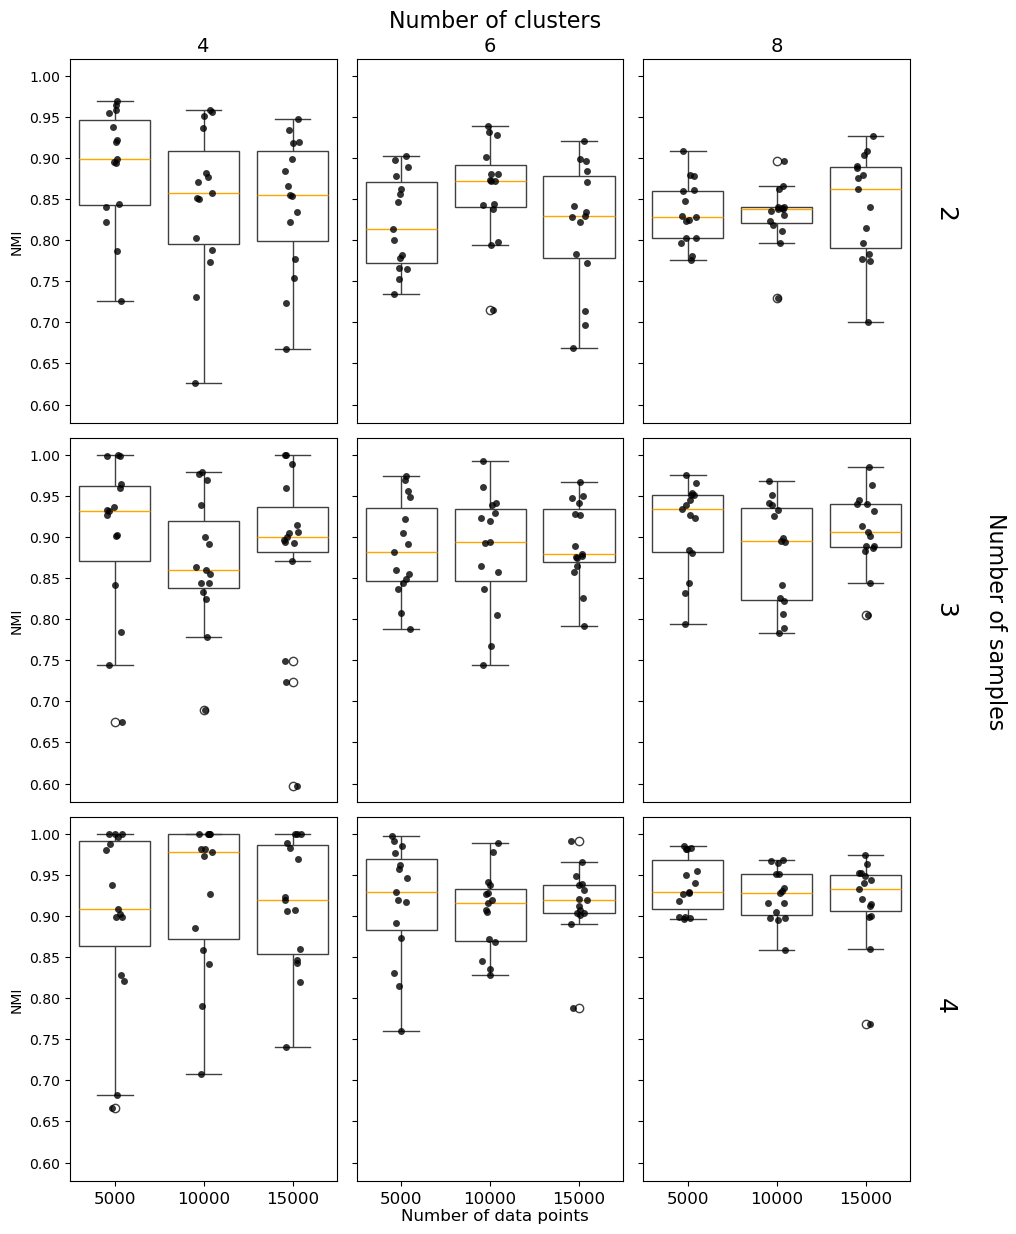

In [3]:
import seaborn as sns
N_values = [5000, 10000, 15000]
K_values = [4, 6, 8]
D_values = [2, 3, 4]
data = []
def read_nmi_file(filename):
    try:
        with open(filename, 'r') as file:
            nmi_values = [float(line.strip()) for line in file.readlines()]
        return nmi_values
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        return []

for N in N_values:
    for K in K_values:
        for D in D_values:
            # Construct the filename based on the pattern
            if D == 2:
                filename = os.path.join(general_folder, f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 3:
                filename = os.path.join(general_folder, f"D_3/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            elif D == 4:
                filename = os.path.join(general_folder, f"D_4/nmi/nmi_N_{N}_K_{K}_D_{D}.txt")
            nmi_values = read_nmi_file(filename)
            if nmi_values:
                for nmi in nmi_values:
                    data.append({
                        'N': N,
                        'K': K,
                        'D': D,
                        'NMI': nmi
                    })
df = pd.DataFrame(data)
# df
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(10, 12), sharey=True)
axes = axes.flatten()

# # Loop through each subplot, creating a boxplot for each K, D combination

for i, (D) in enumerate(D_values):
    for j, (K) in enumerate(K_values):
        ax = axes[i * 3 + j]
        subset = df[(df['K'] == K) & (df['D'] == D)]
        
        # Create the boxplot with N as the x-axis and NMI as the y-axis
        sns.boxplot(
            x='N', y='NMI', data=subset, ax=ax,
            showfliers=True,                
            boxprops=dict(facecolor='none'),
            medianprops=dict(color='orange')
        )
        # Add the stripplot for the individual data points (all dots)
        sns.stripplot(
            x='N', y='NMI', data=subset, ax=ax,
            color='black',
            jitter=True,
            alpha=0.8,
            size=5
        )
        # for n, (N) in enumerate(N_values):
        #     subset_n =  subset[(subset['N'] == N)]
        #     box = ax.boxplot(subset_n['NMI'], positions=[n], notch=False, patch_artist=True, widths=0.6)
        #     for patch in box['boxes']:
        #         patch.set_facecolor((0, 0, 0, 0))
        #         patch.set_edgecolor('black')
        #         patch.set_linewidth(2)
        
        #     for median in box['medians']:
        #             median.set_color('orange')
        #             median.set_linewidth(2)  # Make the median line bold
        ax.set_xlabel('')
        ax.set_ylabel('NMI')
        if i == len(D_values) - 1:  # For the last row of subplots
            ax.set_xticks([0, 1, 2])  # Place x-ticks at positions 1, 2, and 3
            ax.set_xticklabels(['5000', '10000', '15000'], fontsize=12)
        else:
            ax.set_xticks([])  # Remove x-ticks for other rows

for i, K in enumerate(K_values):
    axes[1*i].set_title(f'{K}', fontsize=14)

# For the right column: Number of samples (D = 2, 3, 4)
for i, D in enumerate(D_values):
    # Position each D label on the right side of the subplots, vertically
    fig.text(0.95, 0.84 - i * 0.33, f'{D}', va='center', ha='center', rotation=-90, fontsize=18)


fig.text(0.5, 1., 'Number of clusters', ha='center', va='center', fontsize=16)
fig.text(1., 0.5, 'Number of samples', ha='center', va='center', rotation=-90, fontsize=16)
fig.text(0.5, 0.00001, 'Number of data points', ha='center', fontsize=12)
plt.savefig('nmi_kmeans.pdf', format='pdf')
plt.savefig('nmi_kmeans.png')
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

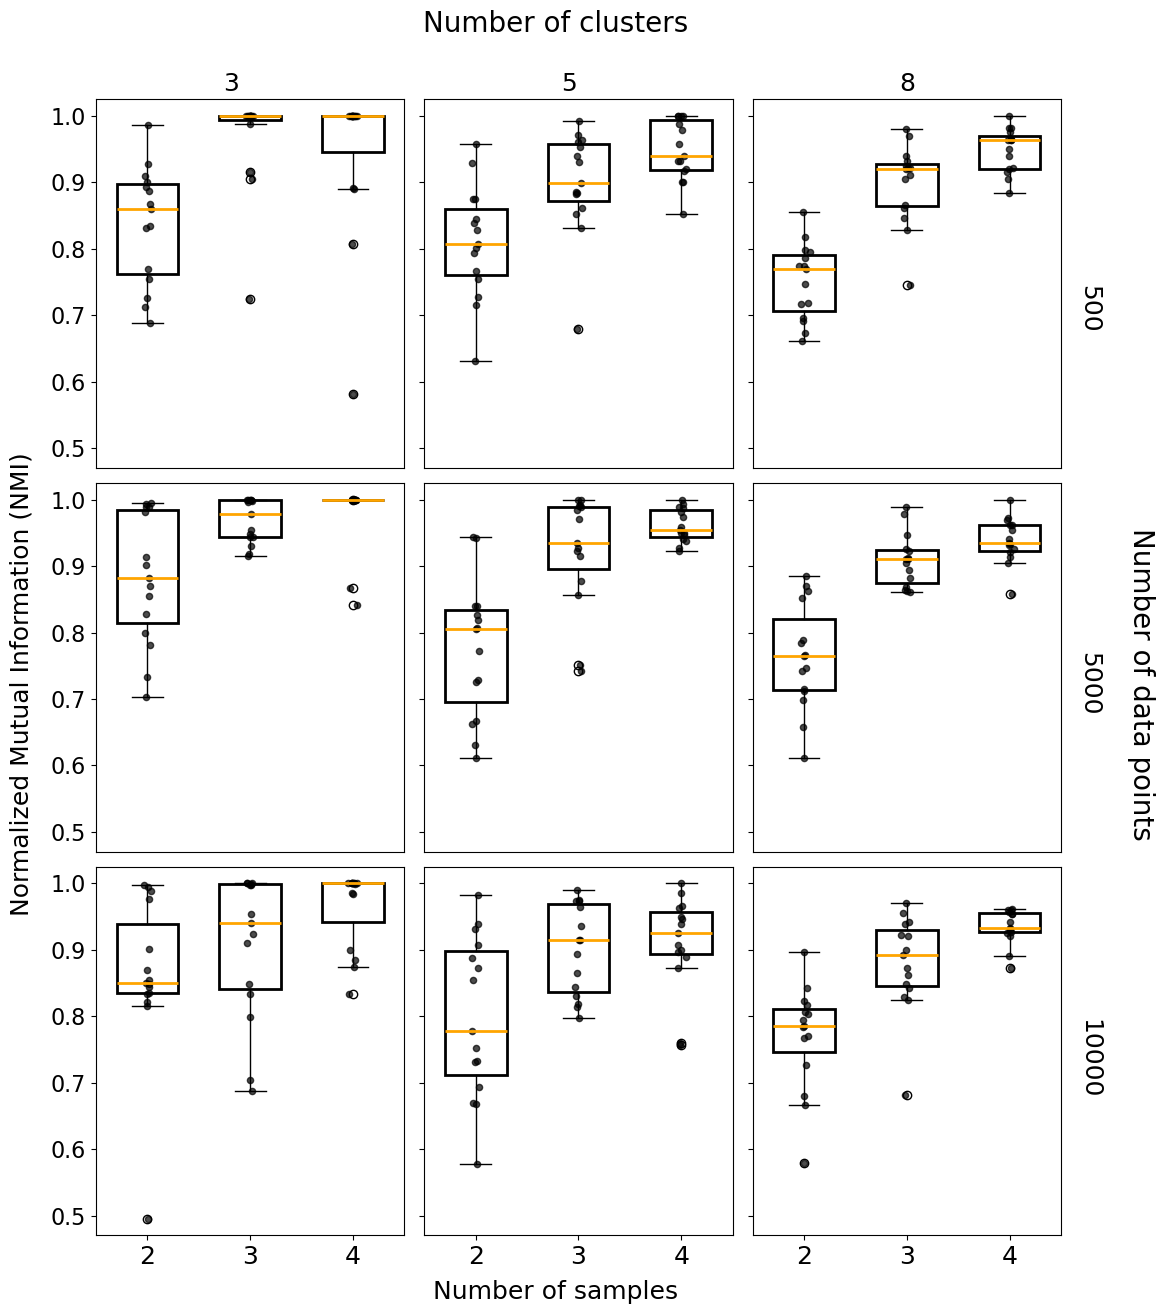

In [8]:
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 2

fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(13, 15), sharey=True)

for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File paths for D = 2, D = 3, and D = 4
        filename_2d = general_folder + f"D_2/nmi/nmi_N_{N}_K_{K}_D_{D_value}.txt"
        filename_3d = general_folder + f"D_3/nmi/nmi_N_{N}_K_{K}_D_3.txt"
        filename_4d = general_folder + f"D_4/nmi/nmi_N_{N}_K_{K}_D_4.txt"
        
        data_2d = None
        data_3d = None
        data_4d = None
        
        # Read the data for D = 2
        if os.path.isfile(filename_2d):
            data_2d = pd.read_csv(filename_2d, header=None).squeeze()
        else:
            print(f"File {filename_2d} not found. Skipping.")
        
        # Read the data for D = 3
        if os.path.isfile(filename_3d):
            data_3d = pd.read_csv(filename_3d, header=None).squeeze()
        else:
            print(f"File {filename_3d} not found. Skipping.")
        
        # Read the data for D = 4
        if os.path.isfile(filename_4d):
            data_4d = pd.read_csv(filename_4d, header=None).squeeze()
        else:
            print(f"File {filename_4d} not found. Skipping.")
        
        if data_2d is not None and data_3d is not None and data_4d is not None:
            ax = axes[i, j]
            # Create the first boxplot for D = 2
            box_2d = ax.boxplot(data_2d, positions=[1], notch=False, patch_artist=True, widths=0.6)
            for patch in box_2d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))
                patch.set_edgecolor('black')
                patch.set_linewidth(2)
                
            for median in box_2d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold
            
            # Create the second boxplot for D = 3
            box_3d = ax.boxplot(data_3d, positions=[2], notch=False, patch_artist=True, widths=0.6)
            for patch in box_3d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))
                patch.set_edgecolor('black')
                patch.set_linewidth(2)

            for median in box_3d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold

            # Create the third boxplot for D = 4
            box_4d = ax.boxplot(data_4d, positions=[3], notch=False, patch_artist=True, widths=0.6)
            for patch in box_4d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))
                patch.set_edgecolor('black')
                patch.set_linewidth(2)
            
            for median in box_4d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold

            # Overlay the individual data points for D = 2, D = 3, and D = 4
            jitter_2d = np.random.normal(0, 0.02, size=len(data_2d))
            jitter_3d = np.random.normal(0, 0.02, size=len(data_3d))
            jitter_4d = np.random.normal(0, 0.02, size=len(data_4d))
            ax.scatter(np.ones(len(data_2d)) + jitter_2d, data_2d, alpha=0.7, color='black', s=20)
            ax.scatter(np.full(len(data_3d), 2) + jitter_3d, data_3d, alpha=0.7, color='black', s=20)
            ax.scatter(np.full(len(data_4d), 3) + jitter_4d, data_4d, alpha=0.7, color='black', s=20)
            ax.tick_params(axis='y', labelsize=16)
            # Set x-ticks only for the last row
            if i == len(N_values) - 1:
                ax.set_xticks([1, 2, 3])
                ax.set_xticklabels(['2', '3', '4'], fontsize=18)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

        else:
            ax.set_xticks([])  # Remove x-ticks if data is missing

for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=18)

fig.text(0.5, 0.94, 'Number of clusters', va='center', ha='center', fontsize=20)

fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=20)

for i, N in enumerate(N_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{N}', va='center', ha='center', rotation=-90, fontsize=18)

fig.text(0.08, 0.5, 'Normalized Mutual Information (NMI)', va='center', rotation='vertical', fontsize=18)

fig.text(0.5, 0.09, 'Number of samples', ha='center', fontsize=18)

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.show()

### ARI boxplots

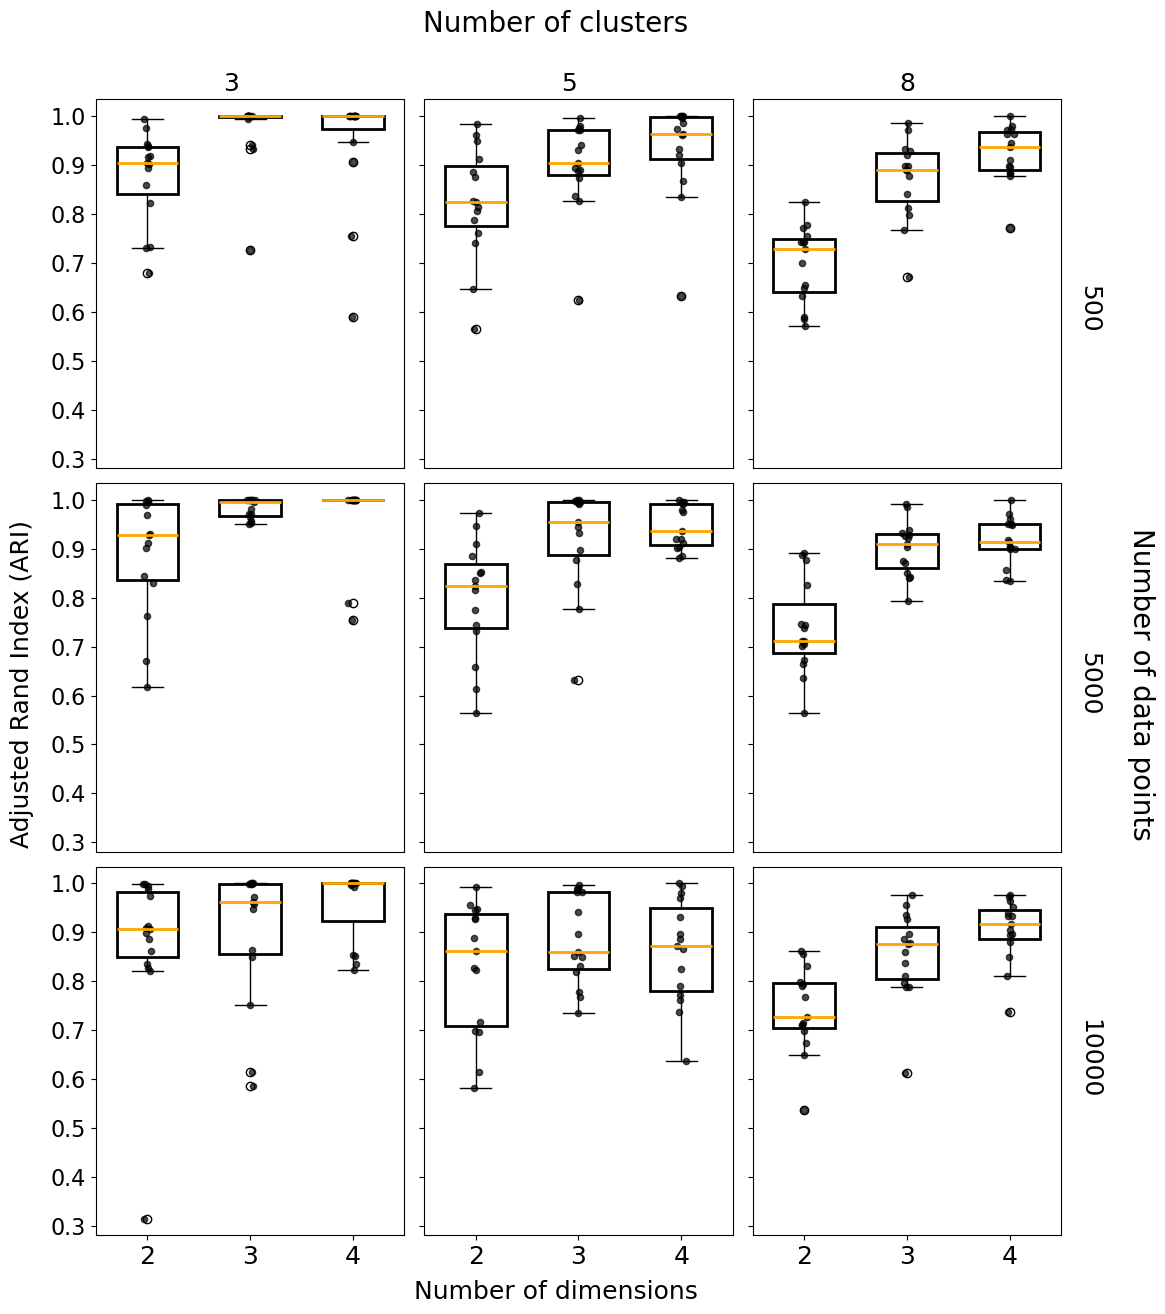

In [9]:
# Define the range of N and K values
N_values = [500, 5000, 10000]
K_values = [3, 5, 8]
D_value = 2

# Create the figure and axes for the subplots
fig, axes = plt.subplots(len(N_values), len(K_values), figsize=(13, 15), sharey=True)

# Loop over the specified values of N and K
for i, N in enumerate(N_values):
    for j, K in enumerate(K_values):
        # File paths for D = 2, D = 3, and D = 4
        filename_2d = general_folder + f"D_2/ari/ari_N_{N}_K_{K}_D_{D_value}.txt"
        filename_3d = general_folder + f"D_3/ari/ari_N_{N}_K_{K}_D_3.txt"
        filename_4d = general_folder + f"D_4/ari/ari_N_{N}_K_{K}_D_4.txt"
        
        data_2d = None
        data_3d = None
        data_4d = None
        
        # Read the data for D = 2
        if os.path.isfile(filename_2d):
            data_2d = pd.read_csv(filename_2d, header=None).squeeze()
        else:
            print(f"File {filename_2d} not found. Skipping.")
        
        # Read the data for D = 3
        if os.path.isfile(filename_3d):
            data_3d = pd.read_csv(filename_3d, header=None).squeeze()
        else:
            print(f"File {filename_3d} not found. Skipping.")
        
        # Read the data for D = 4
        if os.path.isfile(filename_4d):
            data_4d = pd.read_csv(filename_4d, header=None).squeeze()
        else:
            print(f"File {filename_4d} not found. Skipping.")
        
        # Plot the boxplots only if all datasets are available
        if data_2d is not None and data_3d is not None and data_4d is not None:
            ax = axes[i, j]
            # Create the first boxplot for D = 2
            box_2d = ax.boxplot(data_2d, positions=[1], notch=False, patch_artist=True, widths=0.6)
            for patch in box_2d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))  # Transparent fill
                patch.set_edgecolor('black')
                patch.set_linewidth(2)  # Set the border to be bold
            # Set the median line color to orange
            for median in box_2d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold
            
            # Create the second boxplot for D = 3
            box_3d = ax.boxplot(data_3d, positions=[2], notch=False, patch_artist=True, widths=0.6)
            for patch in box_3d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))  # Transparent fill
                patch.set_edgecolor('black')
                patch.set_linewidth(2)  # Set the border to be bold
            # Set the median line color to orange
            for median in box_3d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold

            # Create the third boxplot for D = 4
            box_4d = ax.boxplot(data_4d, positions=[3], notch=False, patch_artist=True, widths=0.6)
            for patch in box_4d['boxes']:
                patch.set_facecolor((0, 0, 0, 0))  # Transparent fill
                patch.set_edgecolor('black')
                patch.set_linewidth(2)  # Set the border to be bold
            # Set the median line color to orange
            for median in box_4d['medians']:
                median.set_color('orange')
                median.set_linewidth(2)  # Make the median line bold

            # Overlay the individual data points for D = 2, D = 3, and D = 4
            jitter_2d = np.random.normal(0, 0.02, size=len(data_2d))
            jitter_3d = np.random.normal(0, 0.02, size=len(data_3d))
            jitter_4d = np.random.normal(0, 0.02, size=len(data_4d))
            ax.scatter(np.ones(len(data_2d)) + jitter_2d, data_2d, alpha=0.7, color='black', s=20)
            ax.scatter(np.full(len(data_3d), 2) + jitter_3d, data_3d, alpha=0.7, color='black', s=20)
            ax.scatter(np.full(len(data_4d), 3) + jitter_4d, data_4d, alpha=0.7, color='black', s=20)
            ax.tick_params(axis='y', labelsize=16)
            # Set x-ticks only for the last row
            if i == len(N_values) - 1:
                ax.set_xticks([1, 2, 3])
                ax.set_xticklabels(['2', '3', '4'], fontsize=18)
            else:
                ax.set_xticks([])  # Remove x-ticks for other rows

        else:
            ax.set_xticks([])  # Remove x-ticks if data is missing

# Adding external labels for rows (Number of data points) and columns (Number of clusters)
# Column labels for different values of K
for j, K in enumerate(K_values):
    fig.text(0.25 + j * 0.26, 0.90, f'{K}', va='center', ha='center', fontsize=18)

# Adding a central label for the overall description of columns
fig.text(0.5, 0.94, 'Number of clusters', va='center', ha='center', fontsize=20)

# Adding the rotated label for "Number of data points" and corresponding N values
fig.text(0.95, 0.5, 'Number of data points', va='center', ha='center', rotation=-90, fontsize=20)

# Adding corresponding labels for N values aligned with the "Number of data points" label
for i, N in enumerate(N_values):
    fig.text(0.91, 0.75 - i * 0.25, f'{N}', va='center', ha='center', rotation=-90, fontsize=18)

# Set the overall Y-axis label
fig.text(0.08, 0.5, 'Adjusted Rand Index (ARI)', va='center', rotation='vertical', fontsize=18)

# Add a central label for the X-axis
fig.text(0.5, 0.09, 'Number of dimensions', ha='center', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.show()
